# Model Building
- in this part i went through Feature selection for life time value calulation and model prepaired for predict the life time earning from particular customer..

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)
import warnings
warnings.simplefilter('ignore')
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [105]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split as tts,cross_val_score,ShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score


In [127]:
cust_inv = pd.read_csv('cust_inv_merged_final.csv')

In [128]:
df = cust_inv.copy()

In [129]:
df['Year'].value_counts()

2016    197286
2015    124719
2014     95617
2013     56057
2012     18635
Name: Year, dtype: int64

In [130]:
df['Customer No.'].nunique()

253484

In [131]:
df[df['Year']==2016]['Customer No.'].nunique()

131243

In [132]:
df[df['Year']==2015]['Customer No.'].nunique()

76142

In [133]:
master_df = df.groupby(['Make','Model','state','City','Order Type']).agg({'Total Amt Wtd Tax.' : 'mean','ServiceHours':'mean'})

In [134]:
master_df.columns = ['Average Revenue','Average Hrs']

In [135]:
master_df.reset_index(inplace=True)

In [136]:
master_df.shape

(36500, 7)

In [137]:
master_df.head()

,Make,Model,state,City,Order Type,Average Revenue,Average Hrs
0,AUDI,A4,Andhra Pradesh,kakinada,Running Repairs,812.353333,10.183333
1,AUDI,A4,Andhra Pradesh,kurnool,Running Repairs,21834.920000,28.300000
2,AUDI,A4,Gujarat,surat,Paid Service,554.630000,2.550000
3,AUDI,A4,Gujarat,vapi,Accidental,2480.490000,2.970000
4,AUDI,A4,Himachal Pradesh,una,Running Repairs,6449.705000,61.122500


In [31]:
cust_inv.columns

Index(['Unnamed: 0', 'Invoice No', 'Job Card No', 'Customer No.', 'Cust Type',
       'Partner Type', 'Order Type', 'Data Origin', 'User ID', 'Plant',
       'Plant Name1', 'City', 'state', 'Zones', 'Make', 'Model', 'Price',
       'Model Category', 'age', 'Days', 'ServiceHours', 'Service_Time',
       'KMs Reading', 'Year', 'Month', 'Season', 'Labour Total', 'Parts Total',
       'OSL Total', 'Misc Total', 'Recovrbl Exp', 'Total Amt Wtd Tax.'],
      dtype='object')

In [32]:
cust_inv['Invoice No'].nunique()

492314

In [138]:
df_2015 = df[df['Year']==2015]

In [139]:
df_2015.shape

(124719, 32)

In [140]:
merged_df = pd.merge(df_2015,master_df,on=['state','City','Make','Model','Order Type'],how='left')

In [143]:
merged_df.shape

(124719, 34)

In [144]:
merged_df[(merged_df['Model']=='SWIFT') & (merged_df['City']=='thane') & (merged_df['Order Type']=='Running Repairs')][['Customer No.','state','City','Model','Order Type','Total Amt Wtd Tax.','Average Revenue','Average Hrs']]

,Customer No.,state,City,Model,Order Type,Total Amt Wtd Tax.,Average Revenue,Average Hrs
50,85432,Maharashtra,thane,SWIFT,Running Repairs,744.04,2485.66509,45.172803
85,80172,Maharashtra,thane,SWIFT,Running Repairs,4560.25,2485.66509,45.172803
154,86419,Maharashtra,thane,SWIFT,Running Repairs,0.00,2485.66509,45.172803
192,87625,Maharashtra,thane,SWIFT,Running Repairs,674.57,2485.66509,45.172803
218,87754,Maharashtra,thane,SWIFT,Running Repairs,647.90,2485.66509,45.172803
242,13143,Maharashtra,thane,SWIFT,Running Repairs,336.00,2485.66509,45.172803
6682,84092,Maharashtra,thane,SWIFT,Running Repairs,0.00,2485.66509,45.172803
6722,84326,Maharashtra,thane,SWIFT,Running Repairs,2519.60,2485.66509,45.172803
6758,85850,Maharashtra,thane,SWIFT,Running Repairs,1460.10,2485.66509,45.172803
6782,86304,Maharashtra,thane,SWIFT,Running Repairs,199.40,2485.66509,45.172803


In [93]:
merged_df[(merged_df['Model']=='800') & (merged_df['state']=='Andhra Pradesh') & (merged_df['City']=='anantapur')][['Customer No.','state','City','Model','Order Type','Total Amt Wtd Tax.','Average Revenue']]

,Customer No.,state,City,Model,Order Type,Total Amt Wtd Tax.,Average Revenue
109221,136393,Andhra Pradesh,anantapur,800,Running Repairs,300.50,1350.8752
109241,136964,Andhra Pradesh,anantapur,800,Paid Service,1195.65,960.3500
109242,136910,Andhra Pradesh,anantapur,800,Running Repairs,1366.00,1350.8752
109253,138056,Andhra Pradesh,anantapur,800,Running Repairs,188.59,1350.8752
109266,138235,Andhra Pradesh,anantapur,800,Running Repairs,378.19,1350.8752
109282,136393,Andhra Pradesh,anantapur,800,Paid Service,1266.35,960.3500
122238,144121,Andhra Pradesh,anantapur,800,Running Repairs,7225.02,1350.8752


In [94]:
merged_df[(merged_df['Model']=='SWIFT') & (merged_df['City']=='thane') & (merged_df['Order Type']=='Running Repairs')]['Average Revenue'].unique()

array([2485.66508969])

In [95]:
merged_df[merged_df['Customer No.']=='E4981'][['Customer No.','state','City','Model','Order Type','Total Amt Wtd Tax.','Average Revenue']]

,Customer No.,state,City,Model,Order Type,Total Amt Wtd Tax.,Average Revenue
9959,E4981,Tamil Nadu,chennai,INDIGO,Paid Service,49.82,5574.580282
10036,E4981,Tamil Nadu,chennai,INDIGO,Running Repairs,162.86,3639.324349
10037,E4981,Tamil Nadu,chennai,INDICA,Running Repairs,162.86,3329.951564
10044,E4981,Tamil Nadu,chennai,INDIGO,Running Repairs,162.86,3639.324349
10045,E4981,Tamil Nadu,chennai,ETIOS,Running Repairs,162.83,958.793757
...,...,...,...,...,...,...,...
101030,E4981,Tamil Nadu,chennai,INDICA,Running Repairs,159.88,3329.951564
101031,E4981,Tamil Nadu,chennai,INDICA,Running Repairs,159.88,3329.951564
101038,E4981,Tamil Nadu,chennai,SWIFT DZIRE,Running Repairs,159.83,2959.457405
101042,E4981,Tamil Nadu,chennai,INDICA,Running Repairs,159.88,3329.951564


In [46]:
merged_df[merged_df['Customer No.']=='E4981']['Average Revenue'].nunique()

27

In [47]:
merged_df[merged_df['Customer No.']=='E4981']['Model'].nunique()

14

In [48]:
df.groupby(['Make','Model','state','City','Order Type'])['Invoice No'].nunique()

Make   Model       state             City             Order Type     
AUDI   A4          Andhra Pradesh    kurnool          Running Repairs    1
                   Gujarat           vapi             Accidental         1
                   Himachal Pradesh  una              Running Repairs    1
                   Karnataka         mysore           Accidental         1
                   Maharashtra       ahmednagar       Running Repairs    2
                                                                        ..
VOLVO  VOLVO S80   Puducherry        puducherry       Paid Service       1
                   Tamil Nadu        thanjavur        Running Repairs    1
       VOLVO XC90  Punjab            zirakpur         Running Repairs    1
                   Tamil Nadu        tiruchirappalli  Running Repairs    1
                   Uttar Pradesh     greater noida    Running Repairs    1
Name: Invoice No, Length: 13296, dtype: int64

In [146]:
merged_df.columns

Index(['Unnamed: 0', 'Invoice No', 'Job Card No', 'Customer No.', 'Cust Type',
       'Partner Type', 'Order Type', 'Data Origin', 'User ID', 'Plant',
       'Plant Name1', 'City', 'state', 'Zones', 'Make', 'Model', 'Price',
       'Model Category', 'age', 'Days', 'ServiceHours', 'Service_Time',
       'KMs Reading', 'Year', 'Month', 'Season', 'Labour Total', 'Parts Total',
       'OSL Total', 'Misc Total', 'Recovrbl Exp', 'Total Amt Wtd Tax.',
       'Average Revenue', 'Average Hrs'],
      dtype='object')

In [145]:
merged_df['Average Revenue'].nunique()

12080

In [148]:
customer_df = merged_df.groupby(['Make','Model','state','City','Order Type','Customer No.']).agg(
    {"Invoice No":'nunique','Total Amt Wtd Tax.':'mean','ServiceHours': 'mean','Average Revenue':'mean','Average Hrs':'mean'})

In [149]:
customer_df.columns = ['Frequency','Mean Amount','Mean hrs','Average Revenue','Average hrs']

In [150]:
customer_df.reset_index(inplace=True)

In [151]:
customer_df.shape

(98429, 11)

In [152]:
customer_df['Customer No.'].nunique()

76142

In [153]:
customer_df.head()

,Make,Model,state,City,Order Type,Customer No.,Frequency,Mean Amount,Mean hrs,Average Revenue,Average hrs
0,AUDI,A4,Andhra Pradesh,kurnool,Running Repairs,113926,1,21834.92,28.30,21834.920,28.300000
1,AUDI,A4,Gujarat,vapi,Accidental,128276,1,2480.49,2.97,2480.490,2.970000
2,AUDI,A4,Himachal Pradesh,una,Running Repairs,137682,1,359.87,0.05,6449.705,61.122500
3,AUDI,A4,Karnataka,mysore,Accidental,144752,1,1343.42,3.50,1343.420,3.500000
4,AUDI,A4,Maharashtra,ahmednagar,Running Repairs,118262,1,1754.44,0.27,1313.000,121.306667


In [57]:
customer_df['Average Revenue'].describe()

count     77787.000000
mean       4703.199666
std        5974.235633
min           0.000000
25%        1802.550338
50%        3048.182449
75%        5205.167741
max      375616.720000
Name: Average Revenue, dtype: float64

In [58]:
customer_df['Average hrs'].describe()

count    77787.000000
mean        78.024450
std        180.549165
min          0.020000
25%          3.405000
50%         20.077143
75%         71.751667
max       2399.120000
Name: Average hrs, dtype: float64

In [61]:
customer_df[customer_df['Average Revenue']==375616.720000]

,Make,Model,state,City,Customer No.,Frequency,Average Revenue,Average hrs
58,BMW,X1,Karnataka,shimoga,118717,1,375616.72,1663.02


In [154]:
customer_df['LTV'] = round((customer_df['Frequency'] * customer_df['Average Revenue']),2)

In [155]:
customer_df.head(50)

,Make,Model,state,City,Order Type,Customer No.,Frequency,Mean Amount,Mean hrs,Average Revenue,Average hrs,LTV
0,AUDI,A4,Andhra Pradesh,kurnool,Running Repairs,113926,1,21834.920000,28.300000,21834.920000,28.300000,21834.92
1,AUDI,A4,Gujarat,vapi,Accidental,128276,1,2480.490000,2.970000,2480.490000,2.970000,2480.49
2,AUDI,A4,Himachal Pradesh,una,Running Repairs,137682,1,359.870000,0.050000,6449.705000,61.122500,6449.71
3,AUDI,A4,Karnataka,mysore,Accidental,144752,1,1343.420000,3.500000,1343.420000,3.500000,1343.42
4,AUDI,A4,Maharashtra,ahmednagar,Running Repairs,118262,1,1754.440000,0.270000,1313.000000,121.306667,1313.00
5,AUDI,A4,Maharashtra,ahmednagar,Running Repairs,129425,1,263.160000,1.800000,1313.000000,121.306667,1313.00
6,AUDI,A4,Maharashtra,pune,Accidental,98005,1,14549.910000,103.950000,8383.633333,131.386667,8383.63
7,AUDI,A4,Punjab,moga,Running Repairs,89967,2,438.485000,1.685000,438.485000,1.685000,876.97
8,AUDI,A4,Tamil Nadu,dharmapuri,Accidental,99532,1,2920.240000,25.630000,2920.240000,25.630000,2920.24
9,AUDI,A4,Tamil Nadu,dharmapuri,Running Repairs,99532,5,3303.552000,78.936000,3303.552000,78.936000,16517.76


In [156]:
final_df =  customer_df

In [157]:
final_df.shape

(98429, 12)

In [76]:
customer_df[customer_df['Customer No.']=='E4981']

,Make,Model,state,City,Customer No.,Frequency,Average Revenue,Average hrs,LTV
4312,FORD,IKON,Tamil Nadu,chennai,E4981,1,5277.108005,1.750000,5277.11
6586,GENERAL MOTORS,ENJOY,Tamil Nadu,chennai,E4981,1,2568.135556,2.550000,2568.14
9625,GENERAL MOTORS,TAVERA NEO,Tamil Nadu,chennai,E4981,1,1635.364714,0.930000,1635.36
28729,MAHINDRA & MAHINDRA,LOGAN D,Tamil Nadu,chennai,E4981,1,7110.682994,1.170000,7110.68
34581,MAHINDRA & MAHINDRA,VERITO,Tamil Nadu,chennai,E4981,1,5682.195628,0.080000,5682.20
36495,MAHINDRA & MAHINDRA,XYLO,Tamil Nadu,chengalpattu,E4981,1,7263.562935,25.330000,7263.56
36981,MAHINDRA & MAHINDRA,XYLO,Tamil Nadu,chennai,E4981,6,11788.973497,9.685000,70733.84
45700,MARUTI SUZUKI,GRAND VITARA,Tamil Nadu,chennai,E4981,1,1864.905000,1.670000,1864.90
51750,MARUTI SUZUKI,SWIFT,Tamil Nadu,chennai,E4981,2,3950.447336,2.025000,7900.89
54870,MARUTI SUZUKI,SWIFT DZIRE,Tamil Nadu,chennai,E4981,23,5200.668372,20.441304,119615.37


In [158]:
final_df['Frequency'].describe()

count    98429.000000
mean         1.267096
std          1.000051
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        103.000000
Name: Frequency, dtype: float64

In [159]:
print("0.05 quantile :-",final_df['LTV'].quantile(0.05))
print("0.25 quantile :-",final_df['LTV'].quantile(0.25))
print("0.50 quantile :-",final_df['LTV'].quantile(0.50))
print("0.75 quantile :-",final_df['LTV'].quantile(0.75))
print("0.95 quantile :-",final_df['LTV'].quantile(0.95))
print("minimum LTV :-",final_df['LTV'].min())
print("maximum LTV :-",final_df['LTV'].max())
print("mean LTV :-",final_df['LTV'].mean())

0.05 quantile :- 191.27
0.25 quantile :- 1898.63
0.50 quantile :- 3549.56
0.75 quantile :- 6318.19
0.95 quantile :- 18914.89
minimum LTV :- 0.0
maximum LTV :- 1609247.05
mean LTV :- 5821.5595937168855


In [162]:
print(final_df[final_df['LTV']<=3549.56].shape)
print(final_df[(final_df['LTV']> 3549.56) & (final_df['LTV']<=6318.19)].shape)
print(final_df[final_df['LTV']>6318.19].shape)

(49217, 12)
(24606, 12)
(24606, 12)


In [163]:
bins=[-1,3549.56,6318.19,1609247.05]
labels=['Low','Medium','High']
final_df['Customer Value Category']=pd.cut(final_df['LTV'], bins=bins, labels=labels)

In [164]:
final_df['Customer Value Category'].value_counts()

Low       49217
High      24606
Medium    24606
Name: Customer Value Category, dtype: int64

In [165]:
final_df.isna().sum()

Make                       0
Model                      0
state                      0
City                       0
Order Type                 0
Customer No.               0
Frequency                  0
Mean Amount                0
Mean hrs                   0
Average Revenue            0
Average hrs                0
LTV                        0
Customer Value Category    0
dtype: int64

In [166]:
final_df.head()

,Make,Model,state,City,Order Type,Customer No.,Frequency,Mean Amount,Mean hrs,Average Revenue,Average hrs,LTV,Customer Value Category
0,AUDI,A4,Andhra Pradesh,kurnool,Running Repairs,113926,1,21834.92,28.30,21834.920,28.300000,21834.92,High
1,AUDI,A4,Gujarat,vapi,Accidental,128276,1,2480.49,2.97,2480.490,2.970000,2480.49,Low
2,AUDI,A4,Himachal Pradesh,una,Running Repairs,137682,1,359.87,0.05,6449.705,61.122500,6449.71,High
3,AUDI,A4,Karnataka,mysore,Accidental,144752,1,1343.42,3.50,1343.420,3.500000,1343.42,Low
4,AUDI,A4,Maharashtra,ahmednagar,Running Repairs,118262,1,1754.44,0.27,1313.000,121.306667,1313.00,Low


In [167]:
model_df =  final_df.copy()

In [168]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [169]:
le=LabelEncoder()
model_df["Make"]=le.fit_transform(model_df["Make"])
model_df["Model"]=le.fit_transform(model_df["Model"])
model_df["state"]=le.fit_transform(model_df["state"])
model_df["City"]=le.fit_transform(model_df["City"])
model_df["Order Type"]=le.fit_transform(model_df["Order Type"])
model_df["Customer Value Category"]=le.fit_transform(model_df["Customer Value Category"])

In [170]:
model_df.head()

,Make,Model,state,City,Order Type,Customer No.,Frequency,Mean Amount,Mean hrs,Average Revenue,Average hrs,LTV,Customer Value Category
0,0,7,0,31,3,113926,1,21834.92,28.30,21834.920,28.300000,21834.92,0
1,0,7,2,74,0,128276,1,2480.49,2.97,2480.490,2.970000,2480.49,1
2,0,7,4,73,3,137682,1,359.87,0.05,6449.705,61.122500,6449.71,0
3,0,7,5,38,0,144752,1,1343.42,3.50,1343.420,3.500000,1343.42,1
4,0,7,8,2,3,118262,1,1754.44,0.27,1313.000,121.306667,1313.00,1


In [208]:
X = model_df.drop(['Customer No.','Customer Value Category','LTV','Frequency','Mean Amount','Mean hrs'],1)

In [209]:
y= model_df['Customer Value Category']

In [210]:
X.columns

Index(['Make', 'Model', 'state', 'City', 'Order Type', 'Average Revenue',
       'Average hrs'],
      dtype='object')

In [211]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=0)

In [212]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=0)

dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86      7463
           1       0.88      1.00      0.94     14706
           2       0.84      0.82      0.83      7360

    accuracy                           0.89     29529
   macro avg       0.91      0.86      0.87     29529
weighted avg       0.90      0.89      0.89     29529



In [213]:
print("Training Accuracy :-" , accuracy_score(y_test,y_pred_dt))
print("Testing Accuracy :-" ,accuracy_score(y_train,y_pred_dt_train))

Training Accuracy :- 0.892106065224017
Testing Accuracy :- 0.8959796806966618


<BarContainer object of 7 artists>

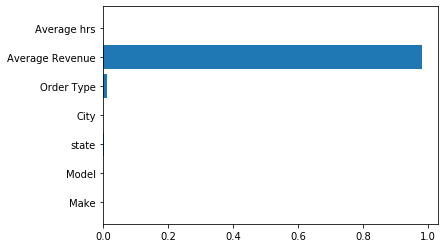

In [214]:
plt.barh(list(X),list(dt.feature_importances_))

In [215]:
dt_cv_score=cross_val_score(estimator=dt,X=X,y=y,cv=5)

print(dt_cv_score.mean())

0.8142615084254856


In [216]:
rfc=RandomForestClassifier(criterion='entropy',max_depth=8,random_state=0)

In [217]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [218]:
y_pred_rfc=rfc.predict(X_test)

In [219]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86      7463
           1       0.88      1.00      0.94     14706
           2       0.84      0.82      0.83      7360

    accuracy                           0.89     29529
   macro avg       0.91      0.86      0.87     29529
weighted avg       0.90      0.89      0.89     29529



In [220]:
accuracy_score(y_test,y_pred_rfc)

0.8926140404348267

<BarContainer object of 7 artists>

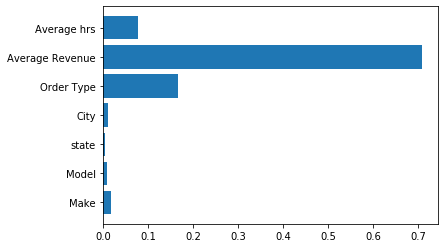

In [222]:
plt.barh(list(X),list(rfc.feature_importances_))

In [223]:
score=cross_val_score(estimator=rfc,X=X,y=y,cv=5)

In [224]:
score.mean()

0.8446593437208005

# Conclusion:
- Here our final coclusion on this project are:- 1.Random forest is most scoring model.
we made ppt on this project...so our final remarks you can see in ppt.

